In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#COMPUTE RECALL BY EPOCH

# Loading the information of  images to lists.

In [0]:
import os
import skimage as imd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import transform
import numpy as np
import pandas as pd
from numpy import load
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
def get_images_paths2(dir_path):
  paths = []
  for im in os.listdir(dir_path):
    path = os.path.join(dir_path, im)
    for im_type in os.listdir(path):
      if im_type.endswith("Image"):
        path = os.path.join(path, im_type)
        path = os.path.join(path, os.listdir(path)[0])
        paths.append(path)
  return paths

# First data  set

###ph2 dataset atypical's  folder

In [0]:
#We read the images through the paths and store them in a list
get_images_paths2("/content/drive/My Drive/MELANOMA/Images/Atypical")
imgs_atypical=[]
for i in get_images_paths2("/content/drive/My Drive/MELANOMA/Images/Atypical"):
    imgs_atypical.append(cv2.imread(i))
len(imgs_atypical)    

80

###ph2 dataset malign's  folder

In [0]:
#malign
get_images_paths2("/content/drive/My Drive/MELANOMA/Images/malign")
imgs_malign=[]
for i in get_images_paths2("/content/drive/My Drive/MELANOMA/Images/malign"):
    imgs_malign.append(cv2.imread(i))
len(imgs_malign)    

40

###ph2 dataset common's  folder

In [0]:
#common
get_images_paths2("/content/drive/My Drive/MELANOMA/Images/common")
imgs_common=[]
for i in get_images_paths2("/content/drive/My Drive/MELANOMA/Images/common"):
    imgs_common.append(cv2.imread(i))
len(imgs_common)

80

###ph2 dataset divided in bad ones and good ones

In [0]:
bad_ones = imgs_malign
good_ones = imgs_atypical + imgs_common

## Loading the other dataset

In [0]:
def get_images_paths_other(dir_path):
  paths_other = []
  for im in os.listdir(dir_path):
    path = os.path.join(dir_path, im)
    paths_other.append(path)
  return paths_other

### Melanoma_folder other data set

In [0]:
#We read the images through the paths and store them in a list
get_images_paths_other("/content/drive/My Drive/complete_mednode_dataset/melanoma")
melanomas=[]
for i in get_images_paths_other("/content/drive/My Drive/complete_mednode_dataset/melanoma"):
    melanomas.append(cv2.imread(i))
len(melanomas)    

70

###naevus_folder other data set

In [0]:
#We read the images through the paths and store them in a list
get_images_paths_other("/content/drive/My Drive/complete_mednode_dataset/naevus")
naevus=[]
for i in get_images_paths_other("/content/drive/My Drive/complete_mednode_dataset/naevus"):
    naevus.append(cv2.imread(i))
len(naevus)    

100

#Gathering the two data sets

In [0]:
final_melanoma_images = melanomas + bad_ones
final_healthy_images = naevus + good_ones
print(len(final_melanoma_images))
print(len(final_healthy_images))

110
260


In [0]:
Test_melanoma = final_melanoma_images[:10] + final_melanoma_images[100:]
Test_healthy = final_healthy_images[:20]+final_healthy_images[240:]
Train_melanoma = final_melanoma_images[10:100]
Train_healthy = final_healthy_images[20:240] 

In [0]:
print(len(Train_melanoma))
print(len(Train_healthy))

90
220


## Balancing the Train_melanoma and Train_healthy sets before the full augmentation takes place.

In [0]:
#First 90 then 40 in range
def Augmentation_rotation(images_):
  folder = []
  for i in range(40):
    exemplar = images_[i]
    sample = expand_dims(exemplar,0)
    datagen = ImageDataGenerator(rotation_range=90)
    it = datagen.flow(sample,batch_size=1)
    batch = it.next()
    folder.append(batch[0].astype('uint8'))
  return folder

In [0]:
new_melanomic = Augmentation_rotation(Train_melanoma)  #90

In [0]:
new_melanomic_2 =Augmentation_rotation(Train_melanoma) #40

In [0]:
print(len(new_melanomic))
print(len(new_melanomic_2))

90
40


In [0]:
Train_melanoma = Train_melanoma + new_melanomic + new_melanomic_2

In [0]:
Train_images = Train_melanoma+ Train_healthy
Test_images = Test_melanoma + Test_healthy
print(len(Train_images))
print(len(Test_images))

# Augmentation

In [0]:
print(len(Train_melanoma), len(Train_healthy))

220 220


In [0]:
def Augmentation_rotation(images_):
  folder = []
  for i in range(len(images_)):
    exemplar = images_[i]
    sample = expand_dims(exemplar,0)
    datagen = ImageDataGenerator(rotation_range=90)
    it = datagen.flow(sample,batch_size=1)
    batch = it.next()
    folder.append(batch[0].astype('uint8'))
  return folder

In [0]:
def Augmentation_brightness(images_):
  folder = []
  for i in range(len(images_)):
    exemplar = images_[i]
    sample = expand_dims(exemplar,0)
    datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
    it = datagen.flow(sample,batch_size=1)
    batch = it.next()
    folder.append(batch[0].astype('uint8'))
  return folder

In [0]:
def Augmentation_height(images_):
  folder = []
  for i in range(len(images_)):
    exemplar = images_[i]
    sample = expand_dims(exemplar,0)
    datagen = ImageDataGenerator(height_shift_range=[0.1])
    it = datagen.flow(sample,batch_size=1)
    batch = it.next()
    folder.append(batch[0].astype('uint8'))
  return folder

In [0]:
def Augmentation_hor_flip(images_):
  folder = []
  for i in range(len(images_)):
    exemplar = images_[i]
    sample = expand_dims(exemplar,0)
    datagen = ImageDataGenerator(horizontal_flip=True)
    it = datagen.flow(sample,batch_size=1)
    batch = it.next()
    folder.append(batch[0].astype('uint8'))
  return folder

In [0]:
def Augmentation_ver_flip(images_):
  folder = []
  for i in range(len(images_)):
    exemplar = images_[i]
    sample = expand_dims(exemplar,0)
    datagen = ImageDataGenerator(vertical_flip=True)
    it = datagen.flow(sample,batch_size=1)
    batch = it.next()
    folder.append(batch[0].astype('uint8'))
  return folder

In [0]:
def Augmentation_zomm(images_):
  folder = []
  for i in range(len(images_)):
    exemplar = images_[i]
    sample = expand_dims(exemplar,0)
    datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
    it = datagen.flow(sample,batch_size=1)
    batch = it.next()
    folder.append(batch[0].astype('uint8'))
  return folder


In [0]:
Augmented_images_melanoma = Augmentation_rotation(Train_melanoma) +Augmentation_rotation(Train_melanoma) + Augmentation_brightness(Train_melanoma) +Augmentation_brightness(Train_melanoma) + Augmentation_height(Train_melanoma) +Augmentation_height(Train_melanoma) +Augmentation_hor_flip(Train_melanoma)+Augmentation_hor_flip(Train_melanoma) + Augmentation_ver_flip(Train_melanoma) +Augmentation_ver_flip(Train_melanoma) + Augmentation_zomm(Train_melanoma)
len(Augmented_images_melanoma)

In [0]:
Augmented_images_healthy = Augmentation_rotation(Train_healthy)+ Augmentation_rotation(Train_healthy) + Augmentation_brightness(Train_healthy) + Augmentation_brightness(Train_healthy) + Augmentation_height(Train_healthy) + Augmentation_height(Train_healthy) +Augmentation_hor_flip(Train_healthy) +Augmentation_hor_flip(Train_healthy) + Augmentation_ver_flip(Train_healthy) + Augmentation_ver_flip(Train_healthy) + Augmentation_zomm(Train_healthy)
len(Augmented_images_healthy)

# Gathering Augmented data

In [0]:
Train_images = Train_melanoma + Augmented_images_melanoma + Train_healthy + Augmented_images_healthy 

In [0]:
len(Train_melanoma) + len(Augmented_images_melanoma) 

2640

In [0]:
len(Train_healthy) + len(Augmented_images_healthy ) 

2640

## RESIZING

In [0]:
Train_images =  [transform.resize(image, (50,50)) for image in Train_images]

In [0]:
Test_images = [transform.resize(image, (50,50)) for image in Test_images]

## Getting target variables

In [0]:
targets_train_melanoma = []
for i in range(2640):
  targets_train_melanoma.append("melanoma")
targets_train_healthy = []
for i in range(2640):
  targets_train_healthy.append("healthy")

In [0]:
targets_test_melanoma = []
for i in range(20):
  targets_test_melanoma.append("melanoma")
targets_test_healthy = []
for i in range(40):
  targets_test_healthy.append("healthy")

In [0]:
train_targets = targets_train_melanoma + targets_train_healthy

In [0]:
test_targets = targets_test_melanoma + targets_test_healthy

## Saving data

In [0]:
from numpy import savez_compressed
savez_compressed("/content/drive/My Drive/train_images50_4_balanced", Train_images)
savez_compressed("/content/drive/My Drive/test_images50_4_balanced", Test_images)

# Start from here if you just want to deploy the model
# LOAD DATA!!!

In [0]:
targets_train_melanoma = []
for i in range(2640):
  targets_train_melanoma.append("melanoma")
targets_train_healthy = []
for i in range(2640):
  targets_train_healthy.append("healthy")

In [0]:
targets_test_melanoma = []
for i in range(20):
  targets_test_melanoma.append("melanoma")
targets_test_healthy = []
for i in range(40):
  targets_test_healthy.append("healthy")

In [0]:
train_targets = targets_train_melanoma + targets_train_healthy

In [0]:
test_targets = targets_test_melanoma + targets_test_healthy

In [0]:
Train_images =  load("/content/drive/My Drive/train_images50_4_balanced.npz")

In [0]:
Train_images = Train_images.f.arr_0

In [0]:
Test_images = load("/content/drive/My Drive/test_images50_4_balanced.npz")

In [0]:
Test_images = Test_images.f.arr_0

# NOT Loading Anymore!

In [0]:
X = np.asarray(Train_images)
Y = np.asarray(train_targets)
X=X/255
Y = pd.get_dummies(Y)
Y = Y.values  #hot-encoding

X_test= np.asarray(Test_images)
X_test=X_test/255
Y_test= test_targets
Y_test = pd.get_dummies(Y_test)
Y_test=Y_test.values

In [0]:
print(X.shape)
print(X_test.shape)

print(Y.shape)
print(Y_test.shape)

(5280, 50, 50, 3)
(60, 50, 50, 3)
(5280, 2)
(60, 2)


### Splitting in Training, validation and Test partions to shuffle (not using dump)

In [0]:
#In order to shuffle de data
from sklearn.model_selection import train_test_split
X, dump1, Y, dump2 = train_test_split(X,Y,test_size=0.001, shuffle=True)

## Modelling

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPool2D, Dropout, GaussianDropout,GaussianNoise
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import metrics

#model.add(BatchNormalization())


model = Sequential()

model.add(Conv2D(input_shape=(50,50,3),filters=100, kernel_size=2, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25)) #No overfitting!


model.add(Conv2D(filters=100, kernel_size=2, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=100, kernel_size=2, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(2, activation="softmax"))



optimizer = optimizers.Adam(lr=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer,metrics=["acc"])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 49, 49, 100)       1300      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 100)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 100)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 23, 23, 100)       40100     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 100)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 11, 11, 100)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 100)      

In [0]:
from keras import callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=500) #No overtraining
mc = ModelCheckpoint('/content/drive/My Drive/BM.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) #save the best_model so far

In [0]:
history = model.fit(X, Y, batch_size=320, validation_data=(X_test,Y_test), epochs=2000, verbose=0, callbacks=[es,mc], shuffle=True)

# Evaluation of the model

In [0]:
#loading the model
from keras.models import load_model
model.load_weights('/content/drive/My Drive/new_model_83.h5') 
#model.save_weights("/content/drive/My Drive/weights_83")

In [0]:
#AUC
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score
from sklearn.metrics import auc

y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test.ravel(), y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.9133333333333333

Text(0, 0.5, 'RECALL (TPR)')

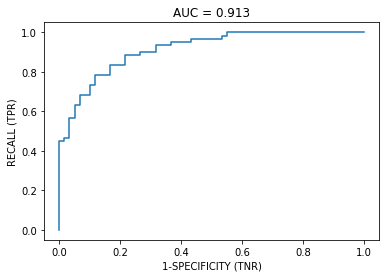

In [0]:
plt.plot(fpr_keras,tpr_keras)
plt.title('AUC = 0.913')
plt.xlabel('1-SPECIFICITY (TNR)')
plt.ylabel('RECALL (TPR)')


AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

In [0]:
#Classification report
from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
y_test_non_category = [ np.argmax(t) for t in Y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_predict ]

#1=melanomas
#0=Healthy ones

report = classification_report(y_test_non_category, y_predict_non_category)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.71      0.85      0.77        20

    accuracy                           0.83        60
   macro avg       0.81      0.84      0.82        60
weighted avg       0.85      0.83      0.84        60



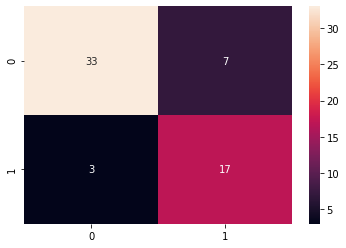

In [0]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns



conf_mat = confusion_matrix(y_test_non_category, y_predict_non_category)
sns.heatmap(conf_mat,annot=True)

## Plot Losses

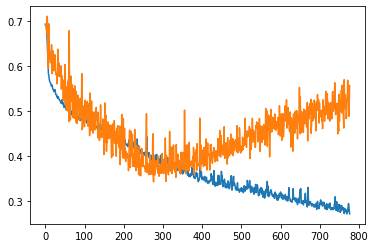

In [0]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
#It stops in the intersection due to earlystopping

##   Test with external data images

From https://www.skinvision.com/moles-pictures/

it is very important to crop first the images such that only the mole appears in the image. In fact when that is done it predicts very well.

In [0]:
#melanomas

1


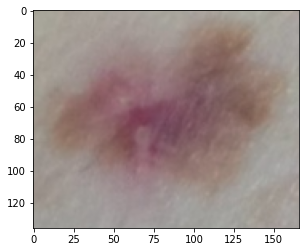

In [0]:
melanoma_1 = plt.imread("/content/drive/My Drive/melanomic_moles/canva-photo-editor (1).png")
plt.imshow(melanoma_1)
melanoma_1 = transform.resize(melanoma_1,(50,50,3))
melanoma_1 = melanoma_1.reshape(1,50,50,3)
melanoma_1 = melanoma_1/255
model.predict(melanoma_1)
print(np.argmax(model.predict(melanoma_1)))

In [0]:
#healthy ones

0


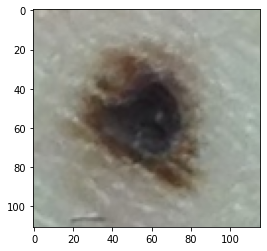

In [0]:
normal_mole= plt.imread("/content/drive/My Drive/Normal_moles/2.png")
plt.imshow(normal_mole)
normal_mole = transform.resize(normal_mole,(50,50,3))
normal_mole = normal_mole.reshape(1,50,50,3)
normal_mole = normal_mole/255
model.predict(normal_mole)
print(np.argmax(model.predict(normal_mole)))